# Visualization of Evaluation of Feature Importance Estimation Methods
The values have been collected with the python script under src folder
### 1. Performance Comparison
each method got tested with its 10 -60 % best ranked features on performance


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import pandas as pd


combined_results = {'ACTIF mean': {'10%': 17.04, '20%': 10.13, '30%': 10.67, '40%': 9.03, '50%': 9.85, '60%': np.nan}, 
                    'ACTIF weighted': {'10%': 19.02, '20%': 14.93, '30%': 13.23, '40%': 10.37, '50%': 8.91, '60%': np.nan}, 
                    'ACTIF norm': {'10%': 18.54, '20%': 10.56, '30%': 10.44, '40%': 10.38, '50%': 9.39, '60%': np.nan}, 
                    'ACTIF inv': {'10%': 16.88, '20%': 9.85, '30%': 9.78, '40%': 9.66, '50%': 9.52, '60%': np.nan}, 
                    'ACTIF pen': {'10%': 20.22, '20%': 10.79, '30%':10.77, '40%': 9.62, '50%': 10.02, '60%': np.nan}, 
                    'Ablation': {'10%': 27.00, '20%': 10.46, '30%': 9.88, '40%': 9.21, '50%': 10.3, '60%': np.nan}, 
                    'Int. Gradient': {'10%': 10.80, '20%': 9.93, '30%': 8.97, '40%': 8.73, '50%': 9.66, '60%': np.nan}, 
                    'Permutation': {'10%': 24.60, '20%': 15.30, '30%': 13.82, '40%': 11.45, '50%': 10.45, '60%': np.nan}, 
                    'SHAP': {'10%': 16.00, '20%': 11.24, '30%': 10.16, '40%': 9.90, '50%': 10.52, '60%': np.nan}
}

In [8]:

# Sample baseline value (you can replace this with the actual baseline value)
baseline_value = 9.9

# Adjusting font settings for titles
title_font = {"size": 22, "alpha": 0.75, "weight": "bold", "ha": "left"}
subtitle_font = {"size": 16, "alpha": 0.65, "weight": "light", "ha": "left"}

# Assuming 'combined_results' is a dictionary loaded correctly
if not isinstance(combined_results, dict):
    raise ValueError("Loaded data is not a dictionary.")

# Extract method names and their respective performances
methods = list(combined_results.keys())
percentages = list(combined_results[methods[0]].keys())

# Setup for a combined line plot with markers
fig, ax = plt.subplots(figsize=(14, 8))

# Define different markers and colors
markers = ['o', 'v', '^', '<', '>', '*', 'X', 'D', 's']
colors = sns.color_palette("viridis", len(methods))  # Use Seaborn's viridis color palette for distinct colors

marker_cycle = cycle(markers)

# Plot each method with a different marker and color
for i, (method, color) in enumerate(zip(methods, colors)):
    percentages_numeric = [int(perc.replace('%', '')) for perc in percentages]
    performances = list(combined_results[method].values())
    marker = next(marker_cycle)
    sns.lineplot(x=percentages_numeric, y=performances, label=method, 
                 marker=marker, ax=ax, markersize=12, 
                 color=color, linewidth=3)  # Increase linewidth here

# Enhance plot readability and appearance using Matplotlib functions
ax.set_xlabel('Percentage of Features', fontsize=18)
ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=18)

# Configure grid and remove top and right spines
ax.grid(True, axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



# Set x-axis ticks and labels
plt.xticks(percentages_numeric, fontsize=14)
plt.yticks(fontsize=14)

# Adjust y-axis tick labels' font size
ax.tick_params(axis='y', which='both', labelsize=18)
ax.tick_params(axis='x', which='major', labelsize=18)  # Set x-axis label size

# Configure legend with a background
legend = ax.legend(fontsize=18, title_fontsize=18, loc='upper right', bbox_to_anchor=(1.1, 1.02), frameon=True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')

# Add title and subtitle
plt.text(-0.05, 1.1, "Comparison of Model Performance", transform=plt.gca().transAxes, ha='left', fontdict=title_font)
plt.text(-0.05, 1.06, "Evaluation across different feature subsets", transform=plt.gca().transAxes, ha='left', fontdict=subtitle_font)

# Create an inset plot
ax_inset = fig.add_axes([0.33, 0.42, 0.45, 0.47])  # Adjust position and size as needed

# Plot the same data on the inset plot
for i, (method, color) in enumerate(zip(methods, colors)):
    percentages_numeric = [int(perc.replace('%', '')) for perc in percentages]
    performances = list(combined_results[method].values())
    marker = next(marker_cycle)
    sns.lineplot(x=percentages_numeric, y=performances, marker=marker, ax=ax_inset, markersize=9, color=color, linewidth=3)

# Zoom in on the range [10, 65] on the x-axis and [8, 12] on the y-axis
ax_inset.set_xlim(18, 52)
ax_inset.set_ylim(8.5, 11.5)
# Add horizontal line for the baseline
ax_inset.axhline(y=baseline_value, color='red', linestyle='--', linewidth=2, label='Baseline')

# Enhance plot readability for the inset plot
ax_inset.tick_params(axis='x', which='major', labelsize=10)
ax_inset.tick_params(axis='y', which='major', labelsize=10)
ax_inset.grid(True)
ax_inset.spines['top'].set_visible(False)
ax_inset.spines['right'].set_visible(False)

# Make the border of the inset plot thicker
for spine in ax_inset.spines.values():
    spine.set_linewidth(2)  # Set the desired thickness

# Ensure layout is tight and save the figure with high resolution
plt.tight_layout()
plt.savefig("./performance_comparison.pdf", dpi=1200)

# Show the plot
plt.show()


C:\Users\hospb\AppData\Local\Temp\ipykernel_14896\849469582.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


### 2. Memory Consumption Comparison


C:\Users\hospb\AppData\Local\Temp\ipykernel_14896\1714878885.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis')


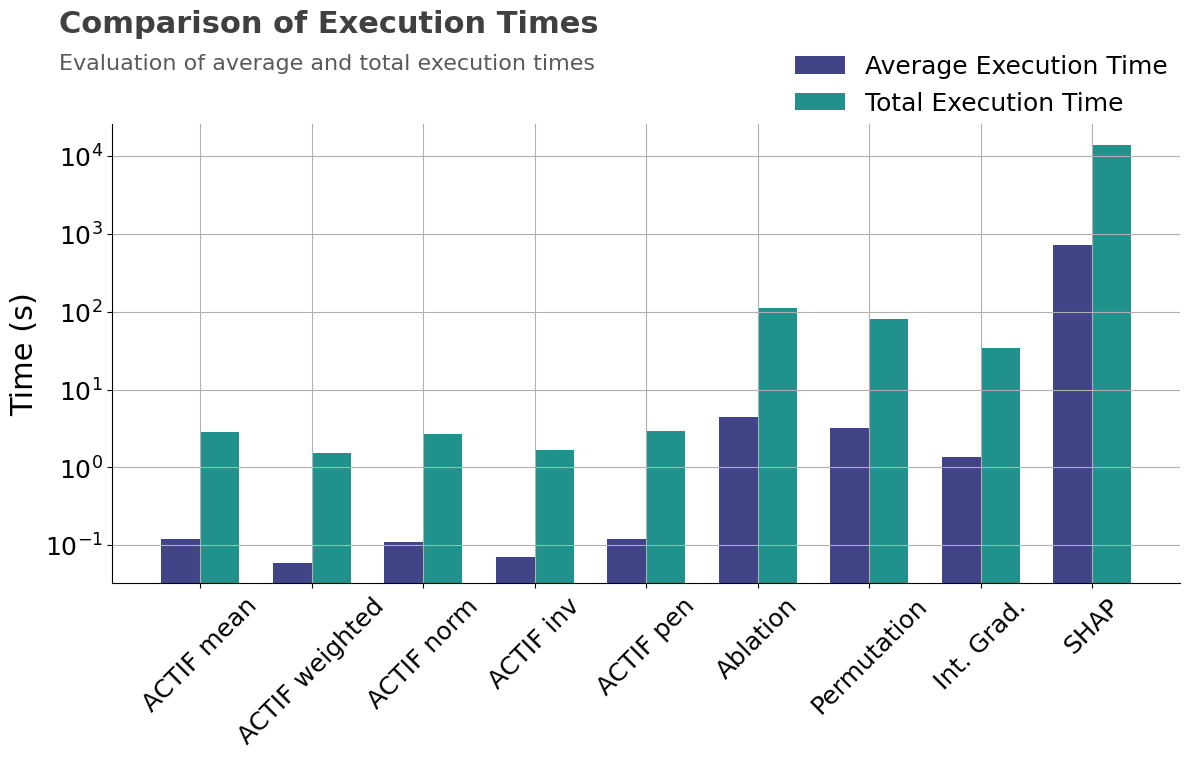

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Get the viridis colormap
viridis = plt.cm.get_cmap('viridis')

# Data
methods = ['SHAP', 'ACTIF', 'Permutation', 'Ablation', 'Integrated Gradients']
avg_execution_time = [726.6942115684, 0.004640964, 1.617511272, 4.416576264, 1.37399864]
total_execution_time = [13807.1900198, 0.1160241, 40.4377818, 110.4144066, 34.349966]

# After ABSTRACT
methods = ['ACTIF mean', 'ACTIF weighted', 'ACTIF norm', 'ACTIF inv', 'ACTIF pen', 'Ablation', 'Permutation', 'Int. Grad.', 'SHAP']
avg_execution_time = [0.12, 0.06, 0.11, 0.07, 0.12, 4.42, 3.19, 1.37, 726.70]
total_execution_time = [2.89, 1.52, 2.66, 1.69, 2.92, 110.41, 79.69, 34.35, 13807.19]


# Adjusting font settings for titles
title_font = {"size": 22, "alpha": 0.75, "weight": "bold", "ha": "left"}
subtitle_font = {"size": 16, "alpha": 0.65, "ha": "left"}

# Colors from the line plot
colors = ['#993768', '#2b8cbe', '#fdae61', '#d73027', '#4575b4']
# Select two colors: one from the beginning and one from the end of the colormap
color1 = viridis(0.2)  # Example: a color from the beginning
color2 = viridis(0.5)  # Example: a color from the end
colors = [color1, color2]


# Plot
plt.figure(figsize=(12, 8))

# Plotting both average and total execution time
x = np.arange(len(methods))
bar_width = 0.35

plt.bar(x, avg_execution_time, width=bar_width, label='Average Execution Time', color=colors[0])
plt.bar(x + bar_width, total_execution_time, width=bar_width, label='Total Execution Time', color=colors[1])

# Enhance plot readability and appearance using Matplotlib functions
#plt.xlabel('Methods', fontsize=18)
plt.ylabel('Time (s)', fontsize=22)
plt.xticks(x + bar_width / 2, methods, rotation=45, fontsize=18)
plt.yscale('log')  # Use logarithmic scale on the y-axis

# Configure grid and remove top and right spines
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set major y-ticks and increase their font size
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=10))
ax.tick_params(axis='y', which='major', labelsize=18)
ax.tick_params(axis='y', which='minor', left=False, labelsize=18)

# Configure legend
# plt.legend(title='Time Type', fontsize=14, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.01, 1.3), frameon=False)
plt.legend(fontsize=18, title_fontsize=16, loc='upper right', bbox_to_anchor=(1.01, 1.2), frameon=False)


# Add title and subtitle
plt.text(-0.05, 1.2, "Comparison of Execution Times", transform=plt.gca().transAxes, ha='left', fontdict=title_font)
plt.text(-0.05, 1.12, "Evaluation of average and total execution times", transform=plt.gca().transAxes, ha='left', fontdict=subtitle_font)

# Ensure layout is tight and save the figure with high resolution
plt.tight_layout()
plt.savefig("./timing_comparison.pdf", dpi=1200)

# Show the plot
plt.show()


### 3. Computational Demand Comparison

C:\Users\hospb\AppData\Local\Temp\ipykernel_14896\1002565307.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(methods, rotation=45, fontsize=18)  # Increased fontsize
C:\Users\hospb\AppData\Local\Temp\ipykernel_14896\1002565307.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(methods, rotation=45, fontsize=18)  # Increased fontsize


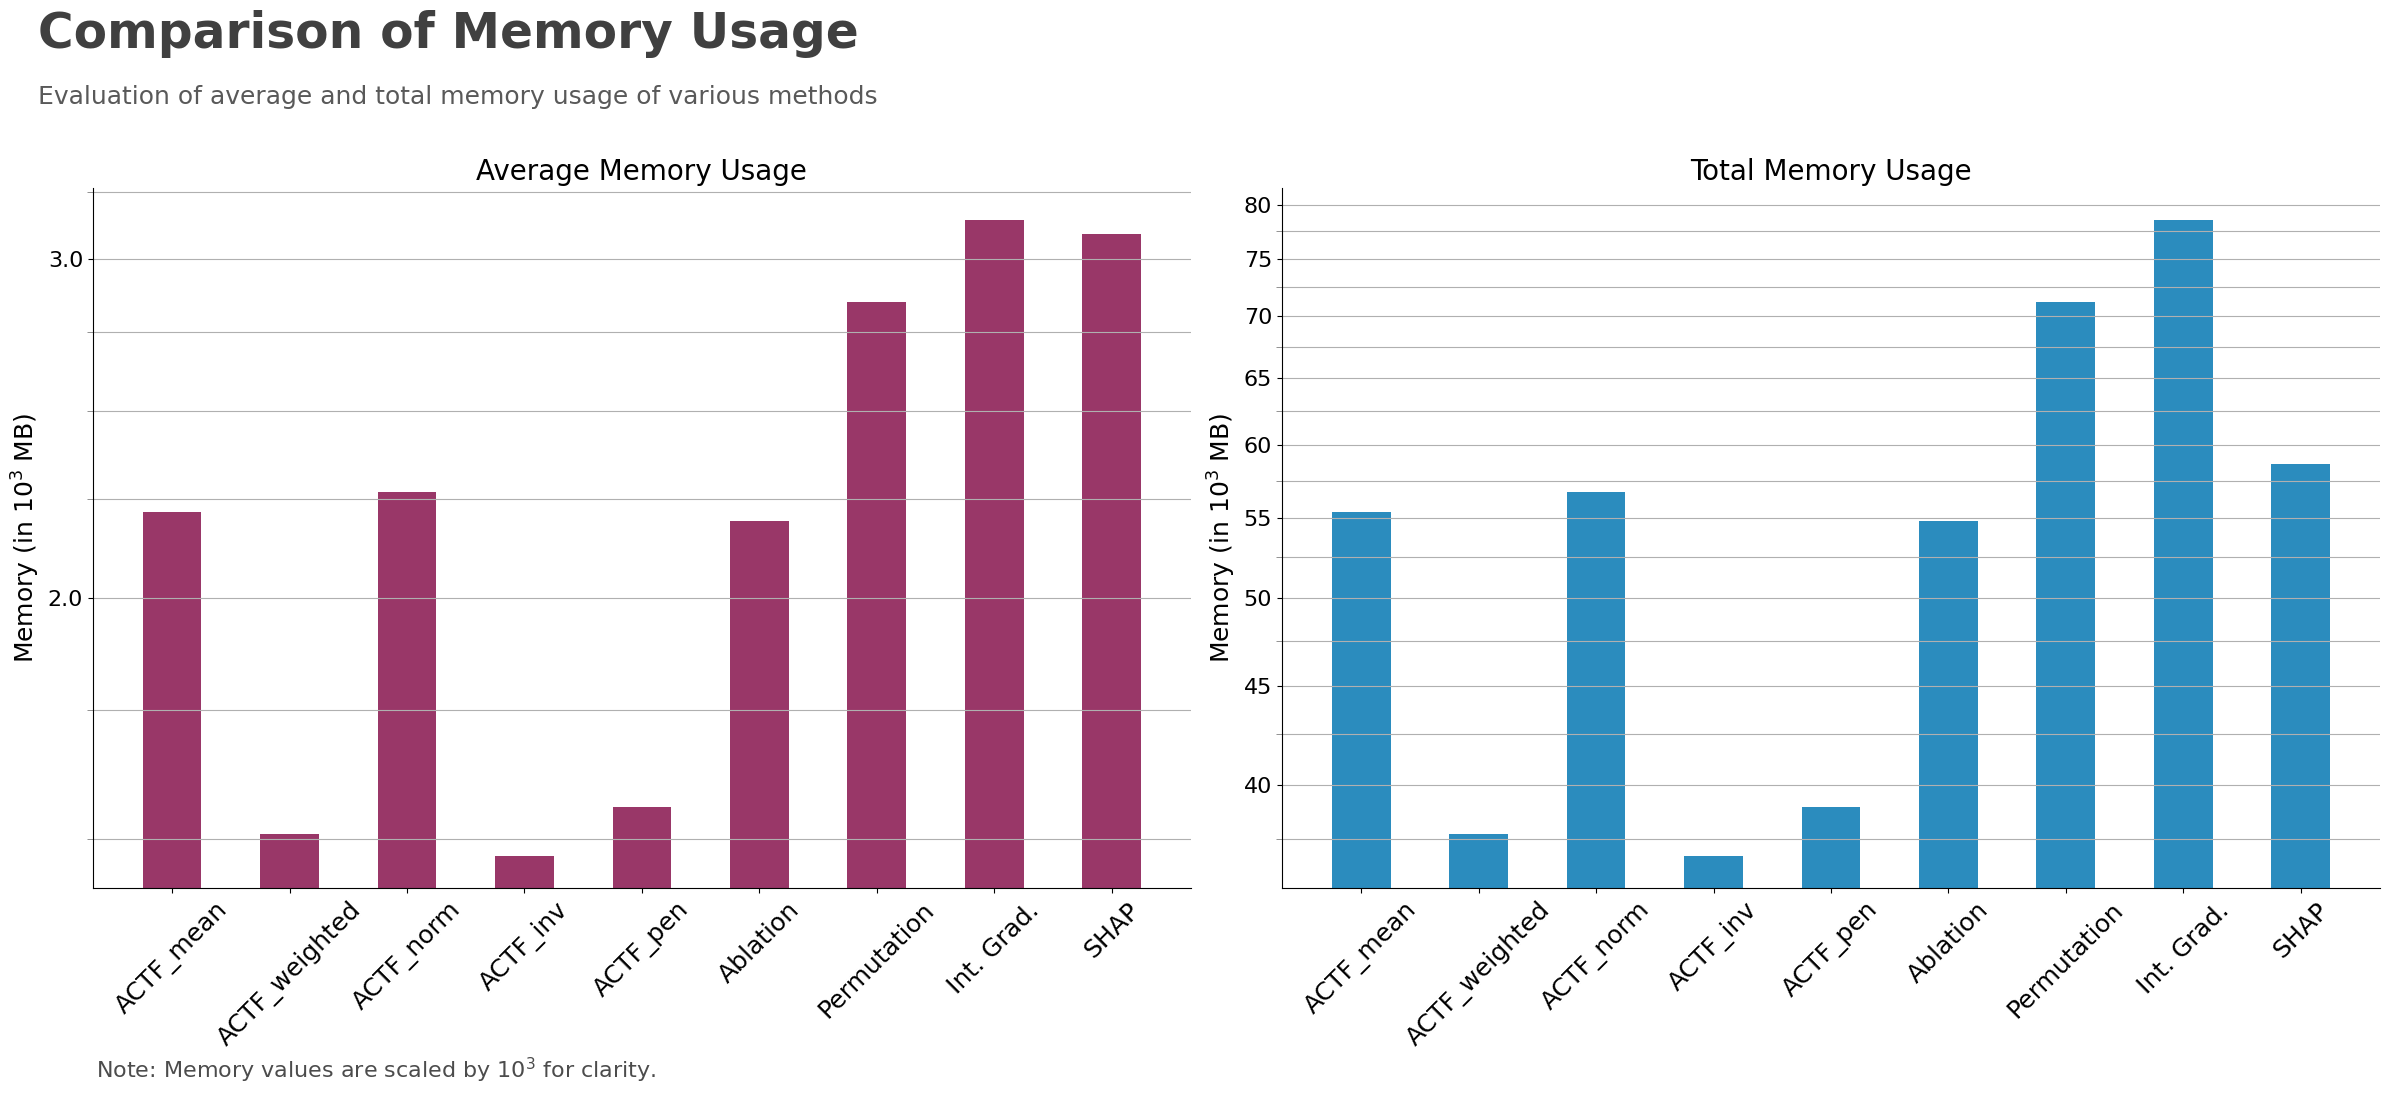

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FixedLocator, FuncFormatter, NullFormatter

# Data
methods = ['ACTF_mean', 'ACTF_weighted', 'ACTF_norm', 'ACTF_inv', 'ACTF_pen', 'Ablation', 'Permutation', 'Int. Grad.', 'SHAP']
avg_memory_usage = [
    2215.51,
    1507.87,
    2270.51,
    1469.24,
    1559.09,
    2191.96,
    2847.91,
    3142.6,
    3087.98
]
total_memory_usage = [
    55387.72,
    37696.81,
    56762.75,
    36730.97,
    38977.34,
    54799.09,
    71197.64,
    78565.00,
    58671.65
]

# Adjusting font settings for titles
title_font = {"size": 35, "alpha": 0.75, "weight": "bold", "ha": "left"}
subtitle_font = {"size": 18, "alpha": 0.65, "ha": "left"}

# Colors for the bars
colors = ['#993768', '#2b8cbe']

# Create figure and gridspec
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(1, 2, width_ratios=[1, 1])

# Formatter to convert to plain numbers divided by 10^3 for the right plot
def plain_number_formatter(x, pos):
    return f'{x / 1e3:.0f}'

# Formatter to convert to single decimal numbers divided by 1000 for the left plot
def single_decimal_formatter(x, pos):
    return f'{x / 1e3:.1f}'

# Plot Average Memory Usage
ax0 = fig.add_subplot(gs[0])
ax0.bar(methods, avg_memory_usage, color=colors[0], width=0.5)
ax0.set_title("Average Memory Usage", fontsize=20)
ax0.set_ylabel('Memory (in $10^3$ MB)', fontsize=18)  # Adjusted label to reflect the scale
ax0.set_xticklabels(methods, rotation=45, fontsize=18)  # Increased fontsize
ax0.set_yscale('log')
ax0.grid(True, which='both', axis='y')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)

# Configure y-axis for Average Memory Usage
major_locator0 = FixedLocator([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
# Adding more minor ticks for finer resolution
minor_locator0 = FixedLocator([1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000])
ax0.yaxis.set_major_locator(major_locator0)
ax0.yaxis.set_minor_locator(minor_locator0)
ax0.yaxis.set_major_formatter(FuncFormatter(single_decimal_formatter))
ax0.yaxis.set_minor_formatter(NullFormatter())  # Hide minor tick labels

ax0.tick_params(axis='y', which='major', labelsize=16)
ax0.tick_params(axis='y', which='minor', length=4, color='gray')

# Plot Total Memory Usage
ax1 = fig.add_subplot(gs[1])
ax1.bar(methods, total_memory_usage, color=colors[1], width=0.5)
ax1.set_title("Total Memory Usage", fontsize=20)
ax1.set_ylabel('Memory (in $10^3$ MB)', fontsize=18)
ax1.set_xticklabels(methods, rotation=45, fontsize=18)  # Increased fontsize
ax1.set_yscale('log')
ax1.grid(True, which='both', axis='y')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Configure y-axis for Total Memory Usage
major_locator1 = FixedLocator([20e3, 25e3, 30e3, 35e3, 40e3, 45e3, 50e3, 55e3, 60e3, 65e3, 70e3, 75e3, 80e3])
minor_locator1 = FixedLocator([22.5e3, 27.5e3, 32.5e3, 37.5e3, 42.5e3, 47.5e3, 52.5e3, 57.5e3, 62.5e3, 67.5e3, 72.5e3, 77.5e3])
ax1.yaxis.set_major_locator(major_locator1)
ax1.yaxis.set_minor_locator(minor_locator1)
ax1.yaxis.set_major_formatter(FuncFormatter(plain_number_formatter))
ax1.yaxis.set_minor_formatter(NullFormatter())  # Hide minor tick labels

ax1.tick_params(axis='y', which='major', labelsize=16)
ax1.tick_params(axis='y', which='minor', length=4, color='gray')

# Add title and subtitle on the left plot
ax0.text(-0.05, 1.2, "Comparison of Memory Usage", transform=ax0.transAxes, ha='left', fontdict=title_font)
ax0.text(-0.05, 1.12, "Evaluation of average and total memory usage of various methods", transform=ax0.transAxes, ha='left', fontdict=subtitle_font)

# Add note at the bottom of the figure
plt.figtext(0.159, 0.01, "Note: Memory values are scaled by $10^3$ for clarity.", fontsize=16, ha='center', alpha=0.7)

# Ensure layout is tight and save the figure with high resolution
plt.tight_layout(rect=[0, 0.02, 1, 0.95])  # Adjusted rect to make space for the note
plt.savefig("./memory_comparison.pdf", dpi=1200)

# Show the plot
plt.show()
